Figure 2a

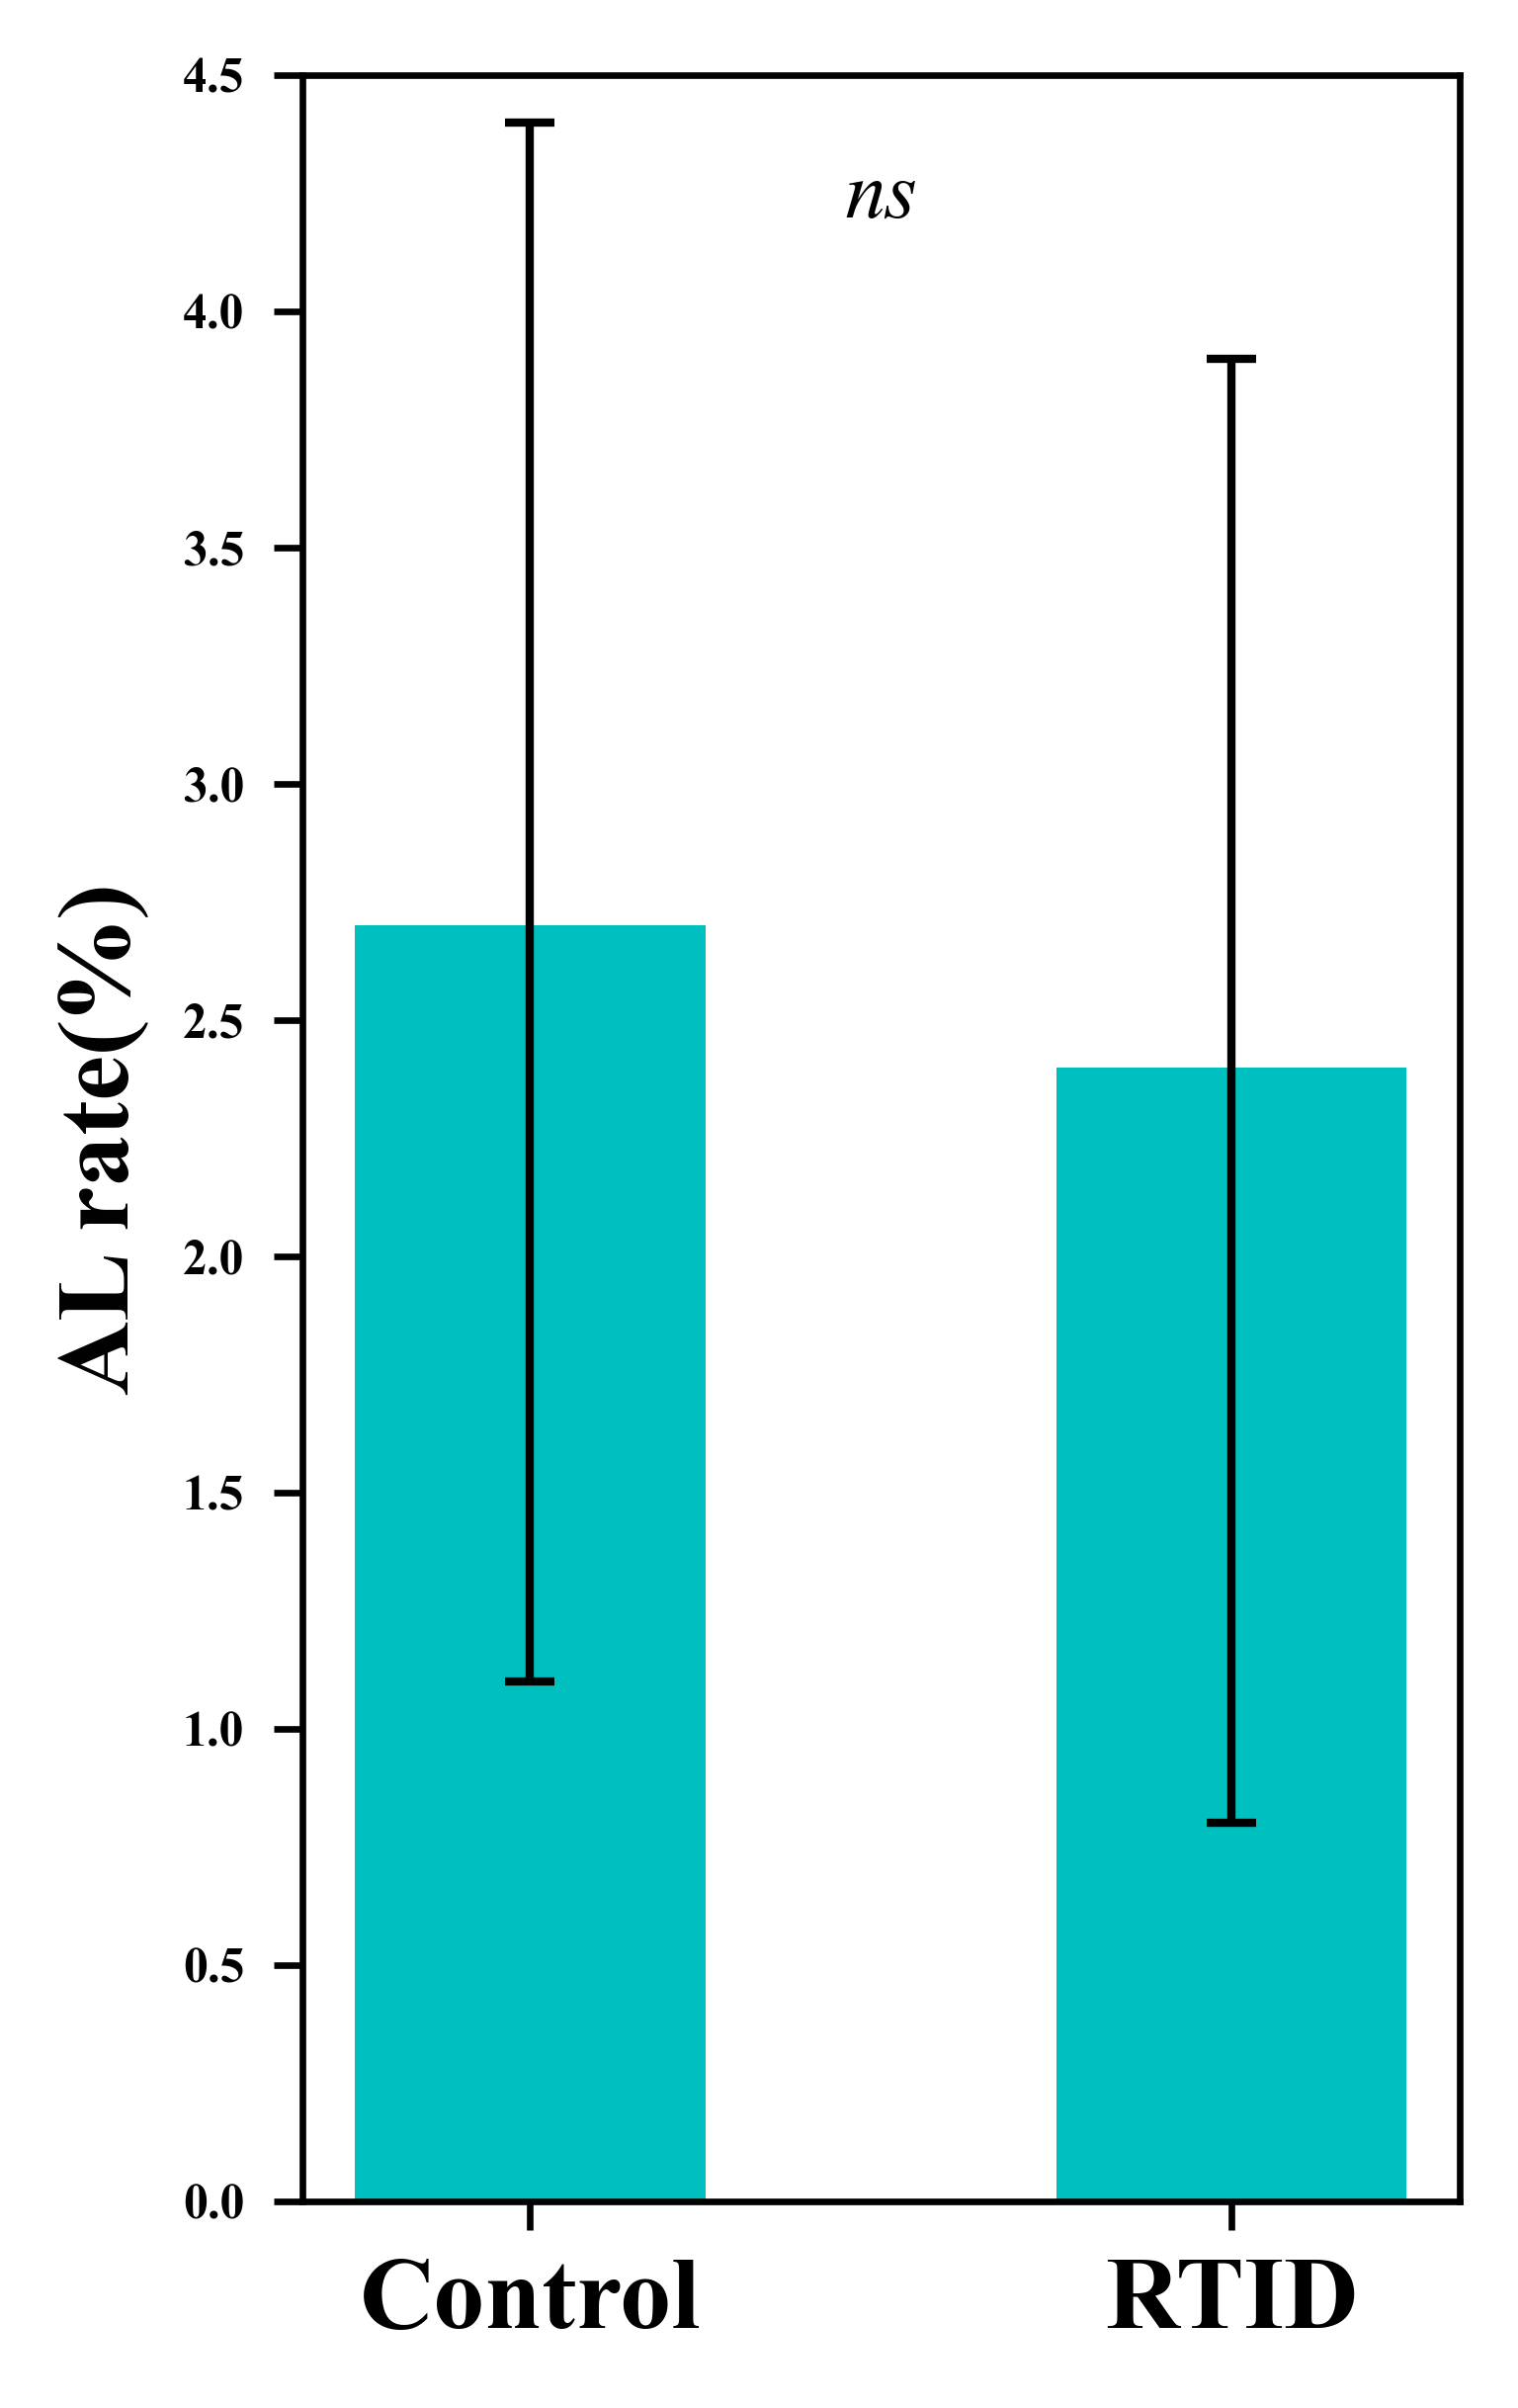

Control：2.7%，95%CI=[1.1, 4.4]%
RTID：2.4%，95%CI=[0.8, 3.9]%


In [5]:
import matplotlib.pyplot as plt
import math
def calculate_binomial_ci(positive, total):
    p = positive / total * 100  
    se = math.sqrt(p * (100 - p) / total)  
    ci_low = max(0, round(p - 1.96 * se, 1))  
    ci_high = round(p + 1.96 * se, 1)
    return round(p, 1), ci_low, ci_high

# data（10/368 和 9/382）
p_control, ci_low_control, ci_high_control = calculate_binomial_ci(10, 368)
p_rtid, ci_low_rtid, ci_high_rtid = calculate_binomial_ci(9, 382)

plt.figure(figsize=(2.5, 4), dpi=600)

categories = ['Control', 'RTID']
values = [p_control, p_rtid]  # 2.7, 2.4

# 95%CI
ci = [[ci_low_control, ci_low_rtid], [ci_high_control, ci_high_rtid]]
yerr = [[values[i] - ci[0][i] for i in range(len(values))], 
        [ci[1][i] - values[i] for i in range(len(values))]]
color = ['c', 'c']
plt.bar(categories, values, color=color, width=0.5, label=categories)

plt.errorbar(categories, values, yerr=yerr, fmt='none', ecolor='black', 
             capsize=3, elinewidth=1, capthick=1)

plt.text(0.5, 4.2, 'ns', ha='center', fontsize=10,
         fontproperties='Times New Roman', fontstyle='italic')

plt.ylabel('AL rate(%)', fontsize=12.5,
           fontproperties='Times New Roman', weight='bold')
plt.xticks(fontproperties='Times New Roman', fontsize=12.5, weight='bold')
plt.yticks(fontproperties='Times New Roman', fontsize=6, weight='bold')

plt.ylim(0, 4.5)

plt.tight_layout(pad=0.5)
#plt.savefig(r"alrate.jpg", dpi=600)
plt.show()

print(f"Control：{p_control}%，95%CI=[{ci_low_control}, {ci_high_control}]%")
print(f"RTID：{p_rtid}%，95%CI=[{ci_low_rtid}, {ci_high_rtid}]%")

Figure 2b

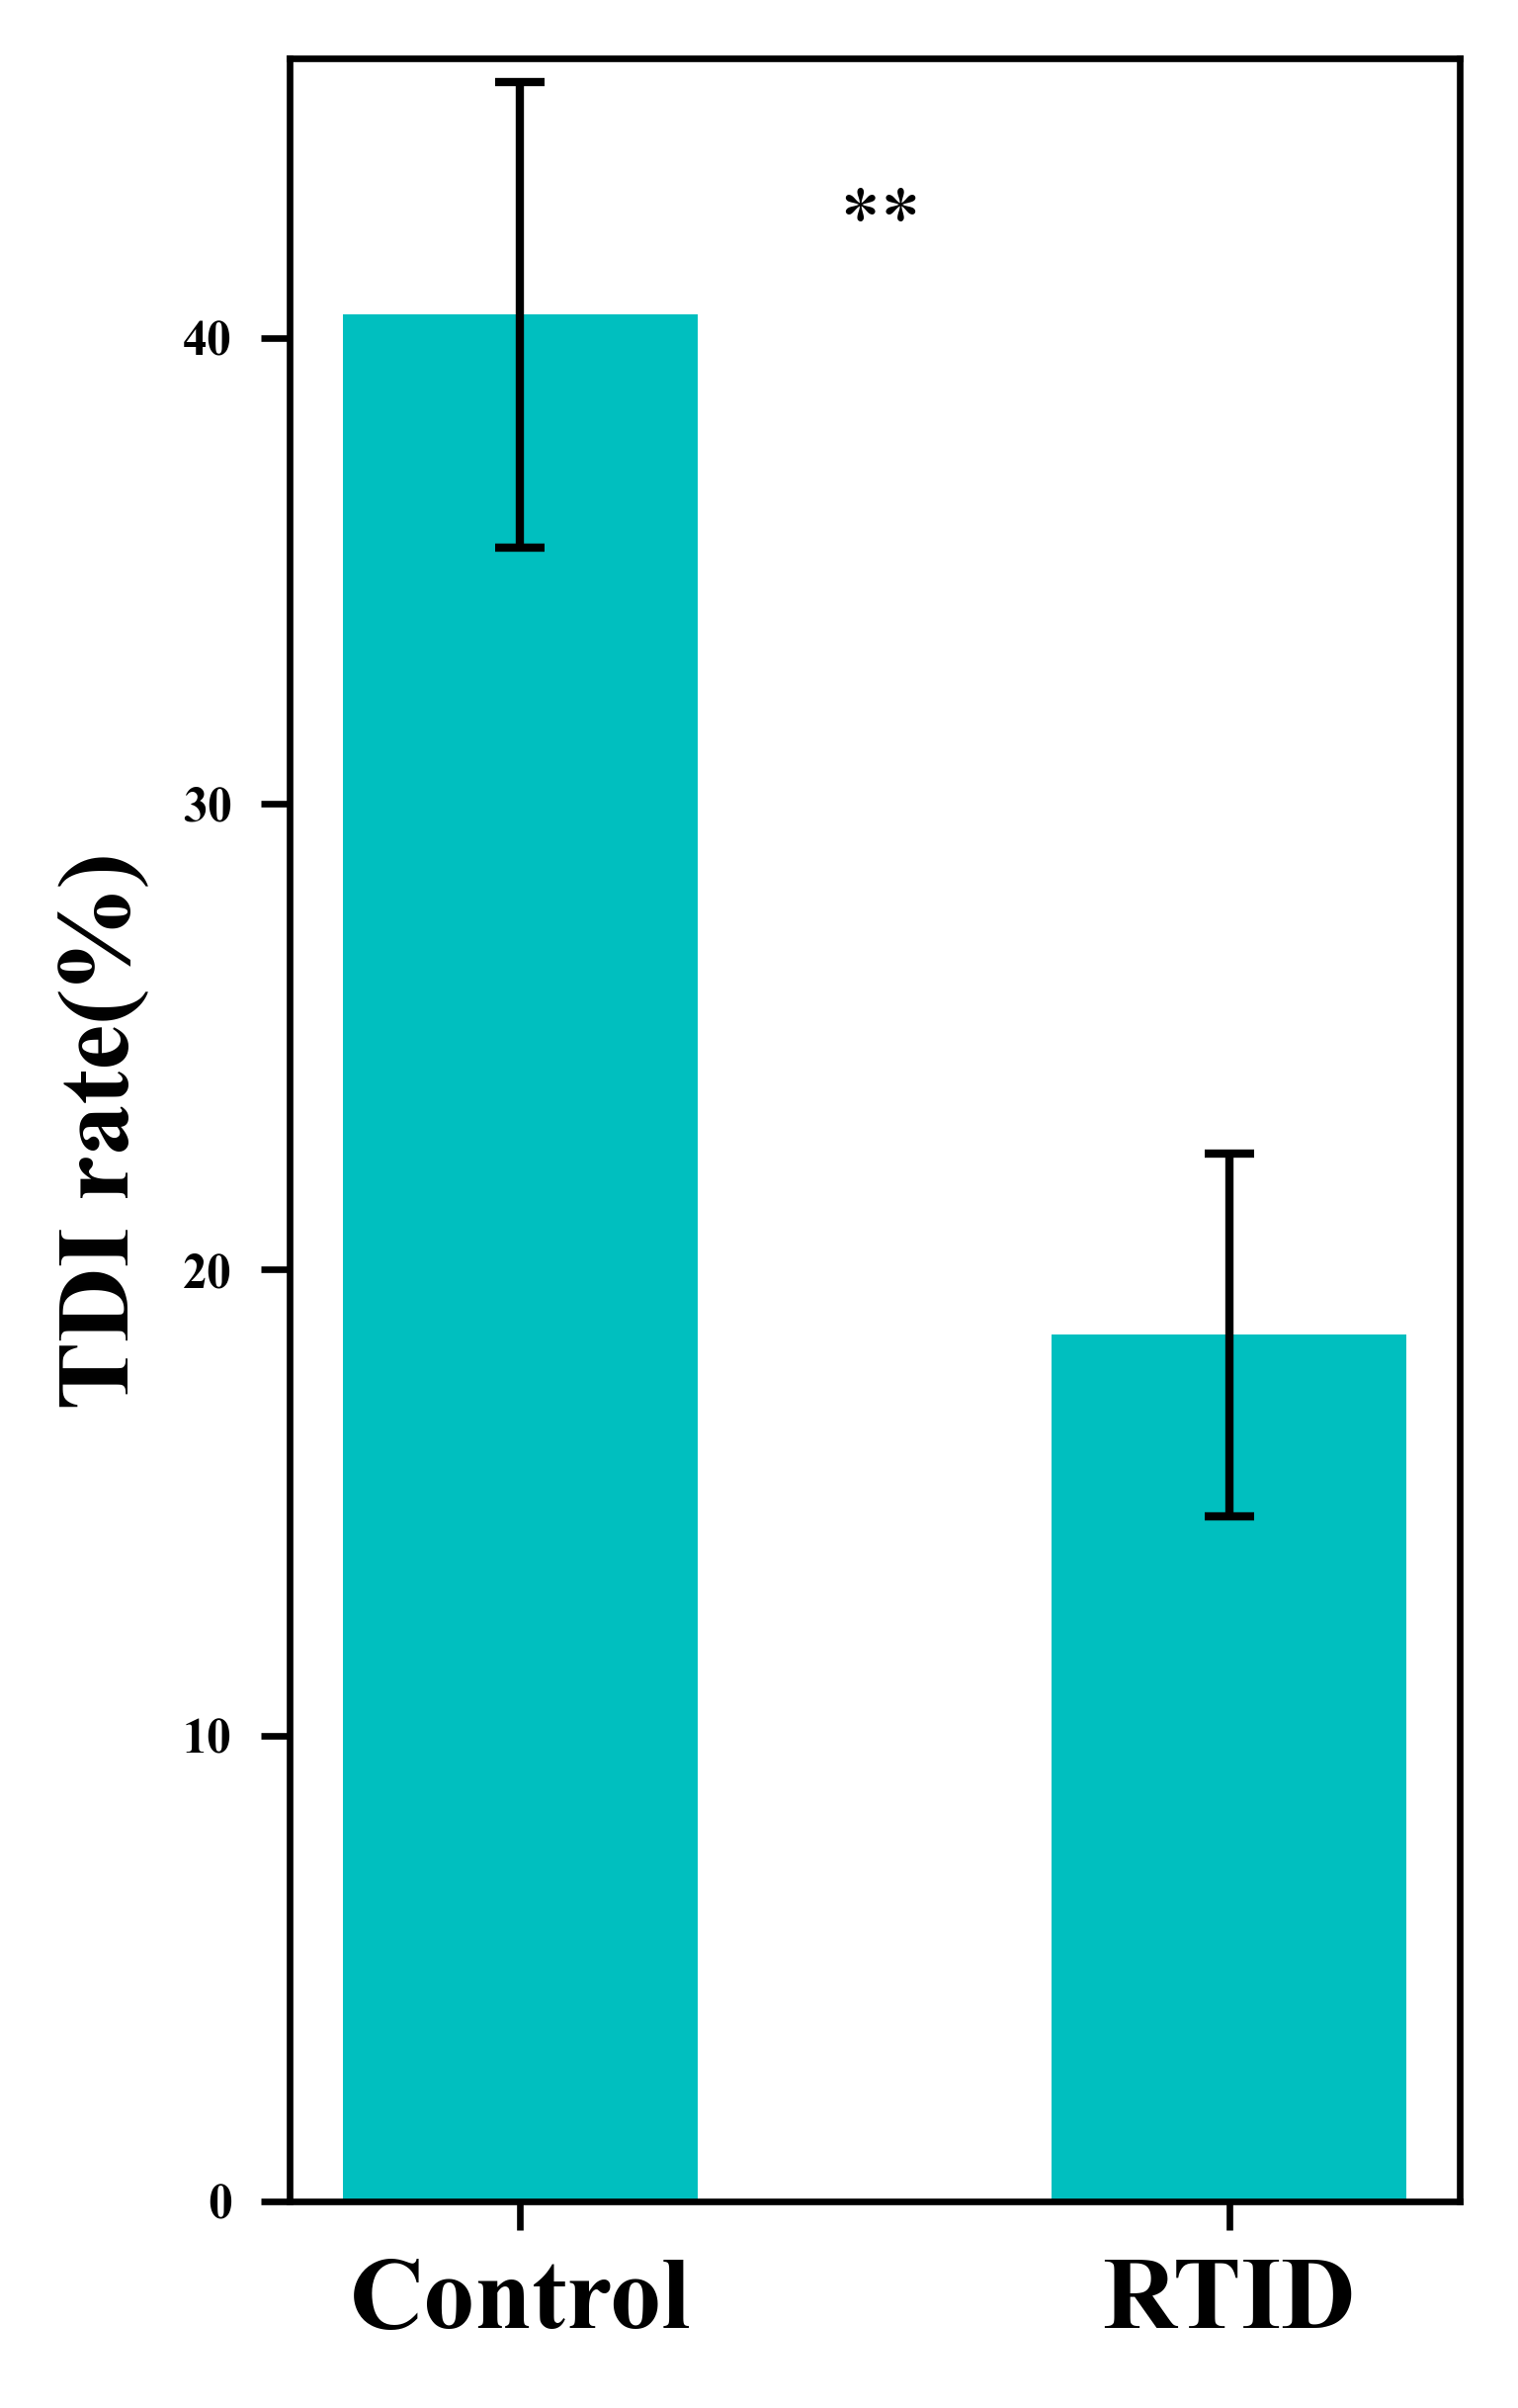

Control：40.5%，95%CI=[35.5, 45.5]%
RTID：18.6%，95%CI=[14.7, 22.5]%


In [7]:
def calculate_binomial_ci(positive, total):
    p = positive / total * 100  
    se = math.sqrt(p * (100 - p) / total) 
    ci_low = max(0, round(p - 1.96 * se, 1)) 
    ci_high = round(p + 1.96 * se, 1)
    return round(p, 1), ci_low, ci_high

# data（149/368 和 71/382）
p_control, ci_low_control, ci_high_control = calculate_binomial_ci(149, 368)
p_rtid, ci_low_rtid, ci_high_rtid = calculate_binomial_ci(71, 382)

plt.figure(figsize=(2.5, 4), dpi=600)

categories = ['Control', 'RTID']
values = [p_control, p_rtid]  

# 95%CI
ci = [[ci_low_control, ci_low_rtid], [ci_high_control, ci_high_rtid]]
yerr = [[values[i] - ci[0][i] for i in range(len(values))], 
        [ci[1][i] - values[i] for i in range(len(values))]]
color = ['c', 'c']
plt.bar(categories, values, color=color, width=0.5, label=categories)

plt.errorbar(categories, values, yerr=yerr, fmt='none', ecolor='black', 
             capsize=3, elinewidth=1, capthick=1)
plt.text(0.5, 42, '**', ha='center', fontsize=10,
         fontproperties='Times New Roman', fontstyle='italic')

plt.ylabel('TDI rate(%)', fontsize=12.5,
           fontproperties='Times New Roman', weight='bold')
plt.xticks(fontproperties='Times New Roman', fontsize=12.5, weight='bold')
plt.yticks(fontproperties='Times New Roman', fontsize=6, weight='bold')

plt.ylim(0, 46)


plt.tight_layout(pad=0.5)
#plt.savefig(r"stomarate.jpg", dpi=600)
plt.show()

print(f"Control：{p_control}%，95%CI=[{ci_low_control}, {ci_high_control}]%")
print(f"RTID：{p_rtid}%，95%CI=[{ci_low_rtid}, {ci_high_rtid}]%")

Figure 2c

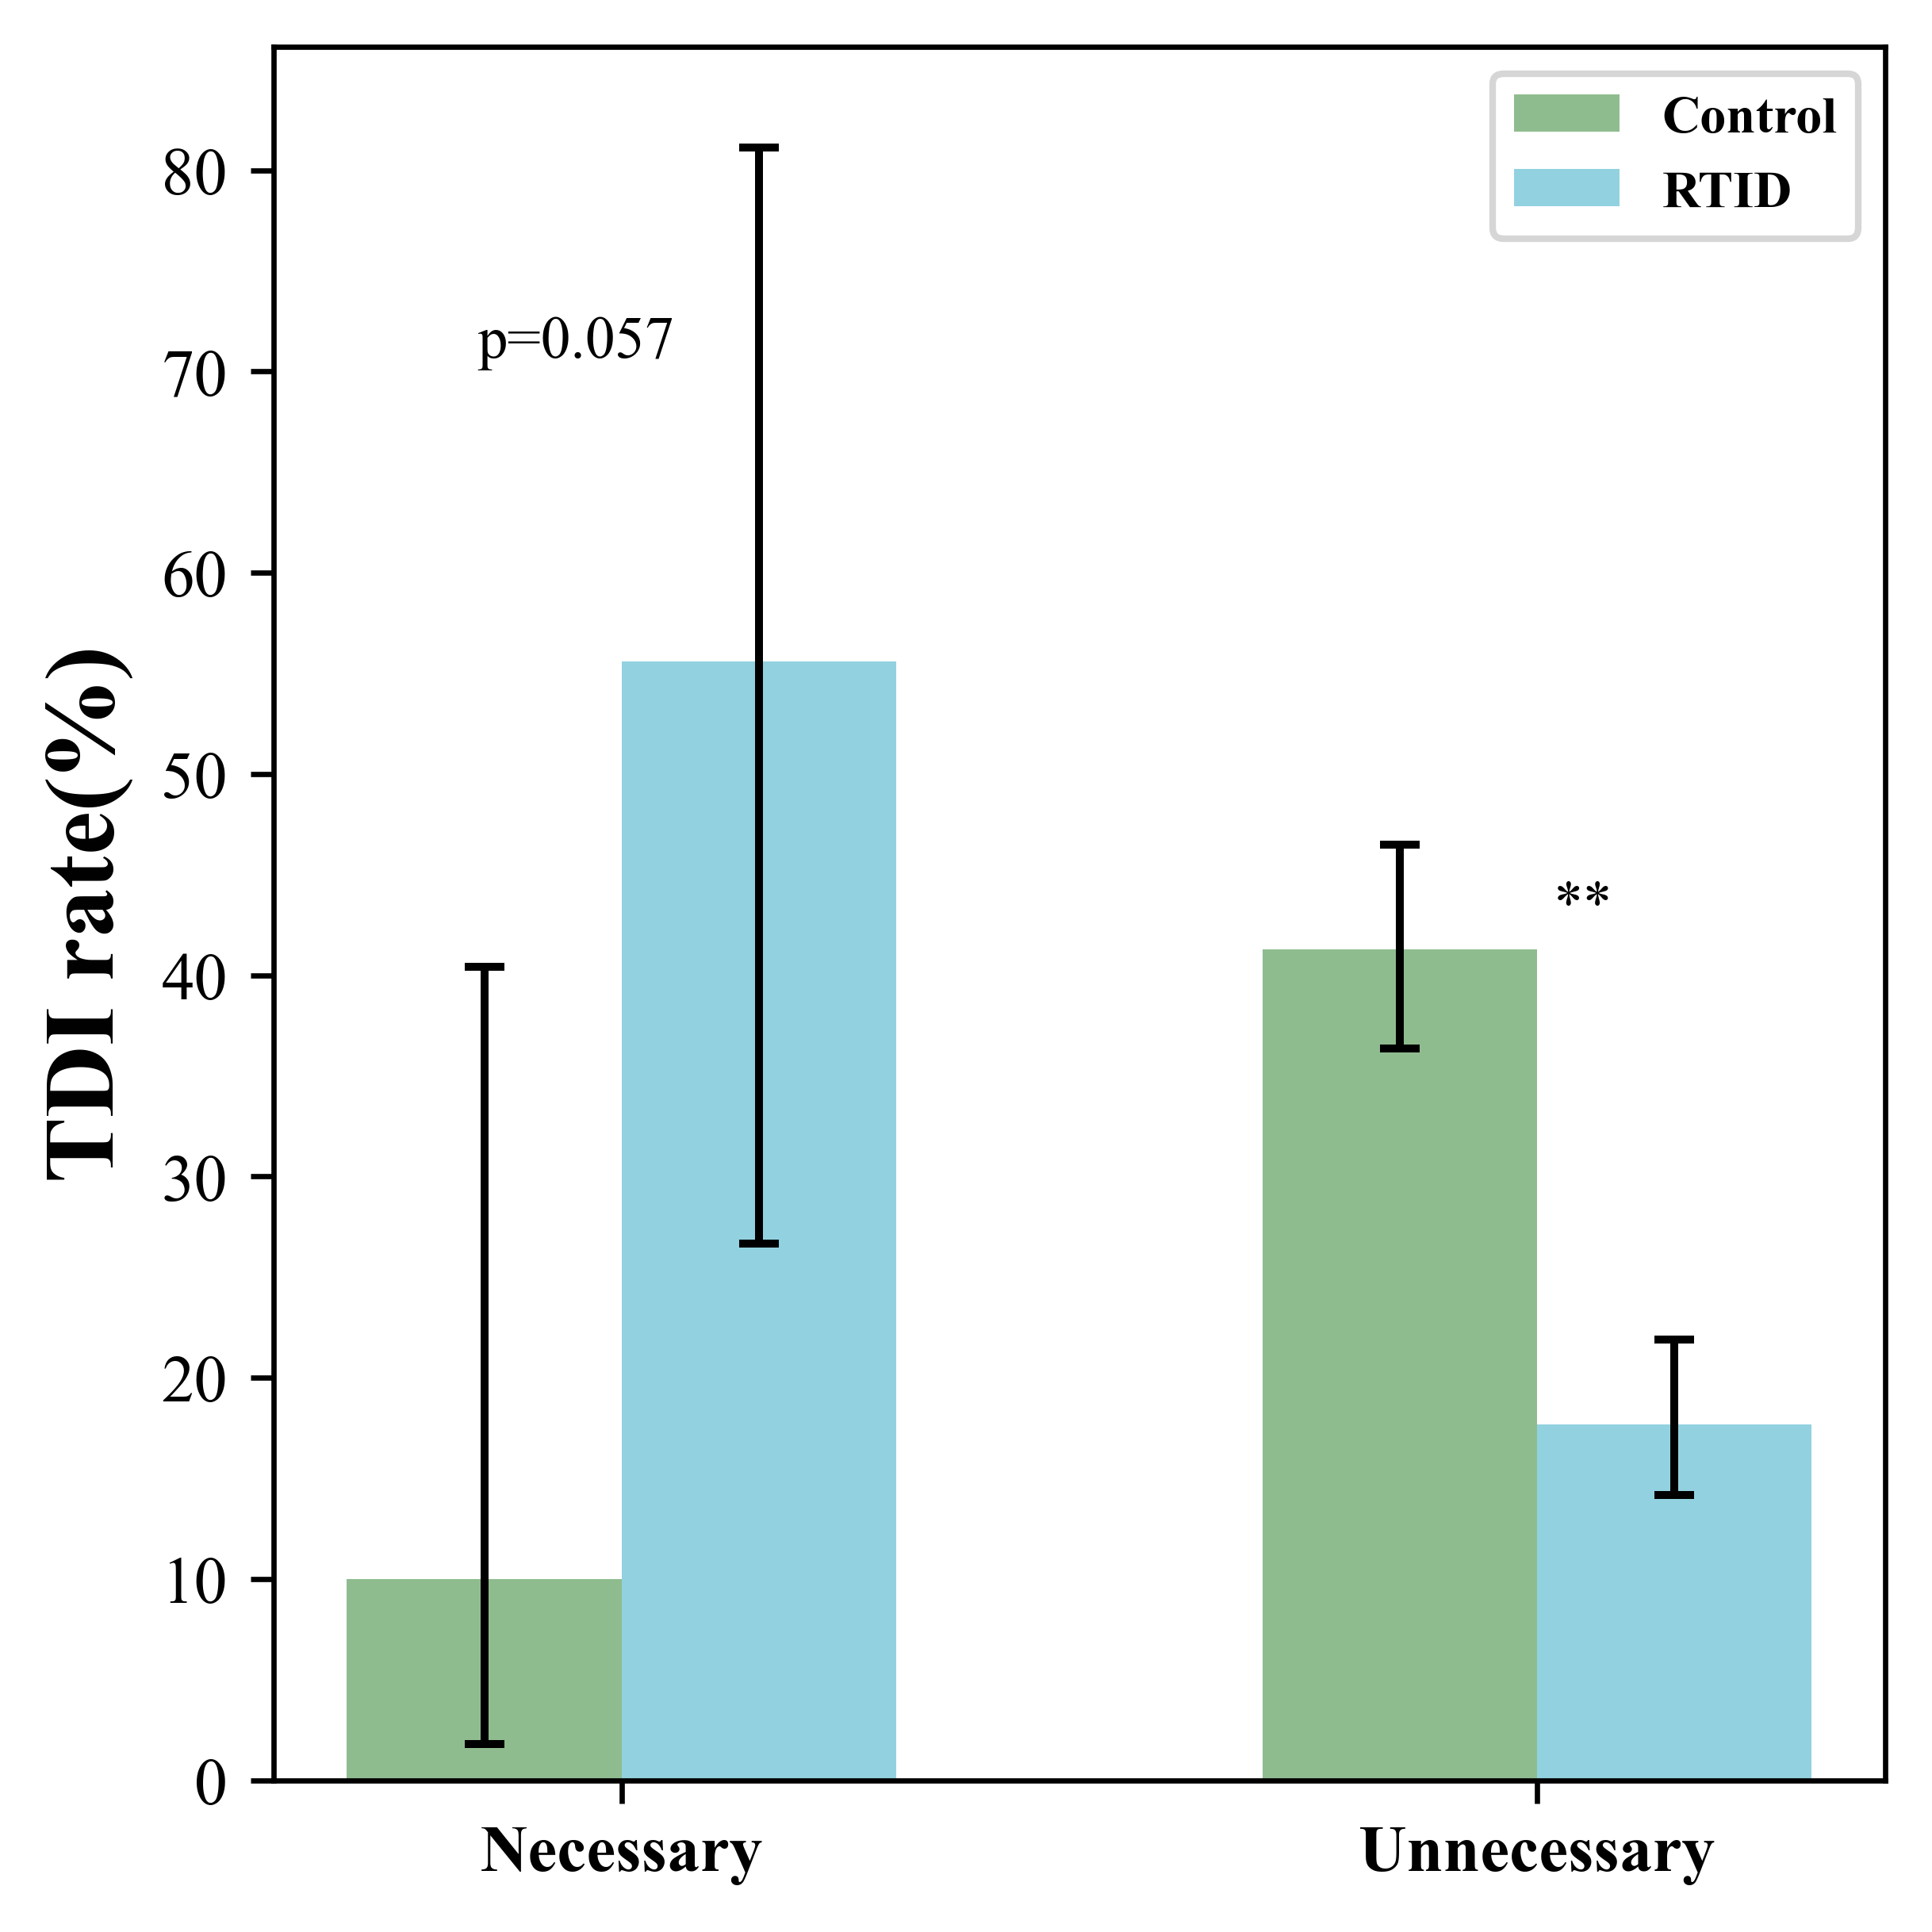

95%CI：

Necessary:
  Control：10.0% (95%CI: 1.8%-40.4%)
  RAITI：55.6% (95%CI: 26.7%-81.1%)

Unnecessary:
  Control：41.3% (95%CI: 36.4%-46.5%)
  RAITI：17.7% (95%CI: 14.2%-21.9%)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# read excel 
excel_file = pd.ExcelFile(r'table 2.xlsx')
df = excel_file.parse('Sheet3')

plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(4, 4), dpi=600)

categories = df['Unnamed: 0'].iloc[:2].tolist() 
control_target = [10.0, 41.3] 
raiti_target = [55.6, 17.7]   

# data（0.1=1/10、0.556=5/9、0.413=148/358、0.177=66/373）
sample_data = {
    'Necessary': {'ctrl_n':1, 'ctrl_total':10, 'raiti_n':5, 'raiti_total':9},
    'Unnecessary': {'ctrl_n':148, 'ctrl_total':358, 'raiti_n':66, 'raiti_total':373}
}

# 95%CI
def calculate_exact_95ci(success, total):
    p = success / total 
    z = 1.96
    denominator = 1 + z**2 / total
    center = (p + z**2 / (2 * total)) / denominator
    margin = z * np.sqrt((p * (1 - p) + z**2 / (4 * total)) / total) / denominator
    ci_lower = (center - margin) * 100
    ci_upper = (center + margin) * 100
    return ci_lower, ci_upper
control_ci_lower = []
control_ci_upper = []
raiti_ci_lower = []
raiti_ci_upper = []

for cat in categories:
    # Control
    ctrl_lower, ctrl_upper = calculate_exact_95ci(
        sample_data[cat]['ctrl_n'], sample_data[cat]['ctrl_total']
    )
    control_ci_lower.append(ctrl_lower)
    control_ci_upper.append(ctrl_upper)
    
    # RTID
    raiti_lower, raiti_upper = calculate_exact_95ci(
        sample_data[cat]['raiti_n'], sample_data[cat]['raiti_total']
    )
    raiti_ci_lower.append(raiti_lower)
    raiti_ci_upper.append(raiti_upper)

bar_width = 0.3
index = range(len(categories)) 

color_control = 'darkseagreen'
color_raiti = '#92D2E0'

# Control
control_bars = plt.bar(index, control_target, bar_width, label='Control', color=color_control)
# RTID
raiti_bars = plt.bar([i + bar_width for i in index], raiti_target, bar_width, label='RTID', color=color_raiti)

# Control
plt.errorbar(
    x=index,
    y=control_target,  
    yerr=[np.subtract(control_target, control_ci_lower), np.subtract(control_ci_upper, control_target)],
    fmt='none',
    ecolor='black',
    capsize=3,
    capthick=1.2,
    elinewidth=1.2
)

# RTID
plt.errorbar(
    x=[i + bar_width for i in index],
    y=raiti_target,  
    yerr=[np.subtract(raiti_target, raiti_ci_lower), np.subtract(raiti_ci_upper, raiti_target)],
    fmt='none',
    ecolor='black',
    capsize=3,
    capthick=1.2,
    elinewidth=1.2
)

plt.xticks([i + bar_width / 2 for i in index], categories, weight='bold')
plt.ylabel('TDI rate(%)', fontsize=15, fontproperties='Times New Roman', weight='bold')
plt.legend(labels=['Control','RTID'],prop={'family': 'Times New Roman', 'weight': 'bold','size': 8})

max_ci = max(max(control_ci_upper), max(raiti_ci_upper))
plt.ylim(0, max_ci + 5)  

plt.text(0.1, 70.1, 'p=0.057', ha='center', va='bottom', fontproperties='Times New Roman', fontsize=9)
plt.text(1.2, 42, '**', ha='center', va='bottom', fontproperties='Times New Roman', fontsize=9)

plt.tight_layout(pad=0.5)
#plt.savefig(r"zaokoubijiao.jpg",dpi=600)
plt.show()

print("95%CI：")
for i, cat in enumerate(categories):
    print(f"\n{cat}:")
    print(f"  Control：{control_target[i]}% (95%CI: {control_ci_lower[i]:.1f}%-{control_ci_upper[i]:.1f}%)")
    print(f"  RAITI：{raiti_target[i]}% (95%CI: {raiti_ci_lower[i]:.1f}%-{raiti_ci_upper[i]:.1f}%)")

Figure 2d

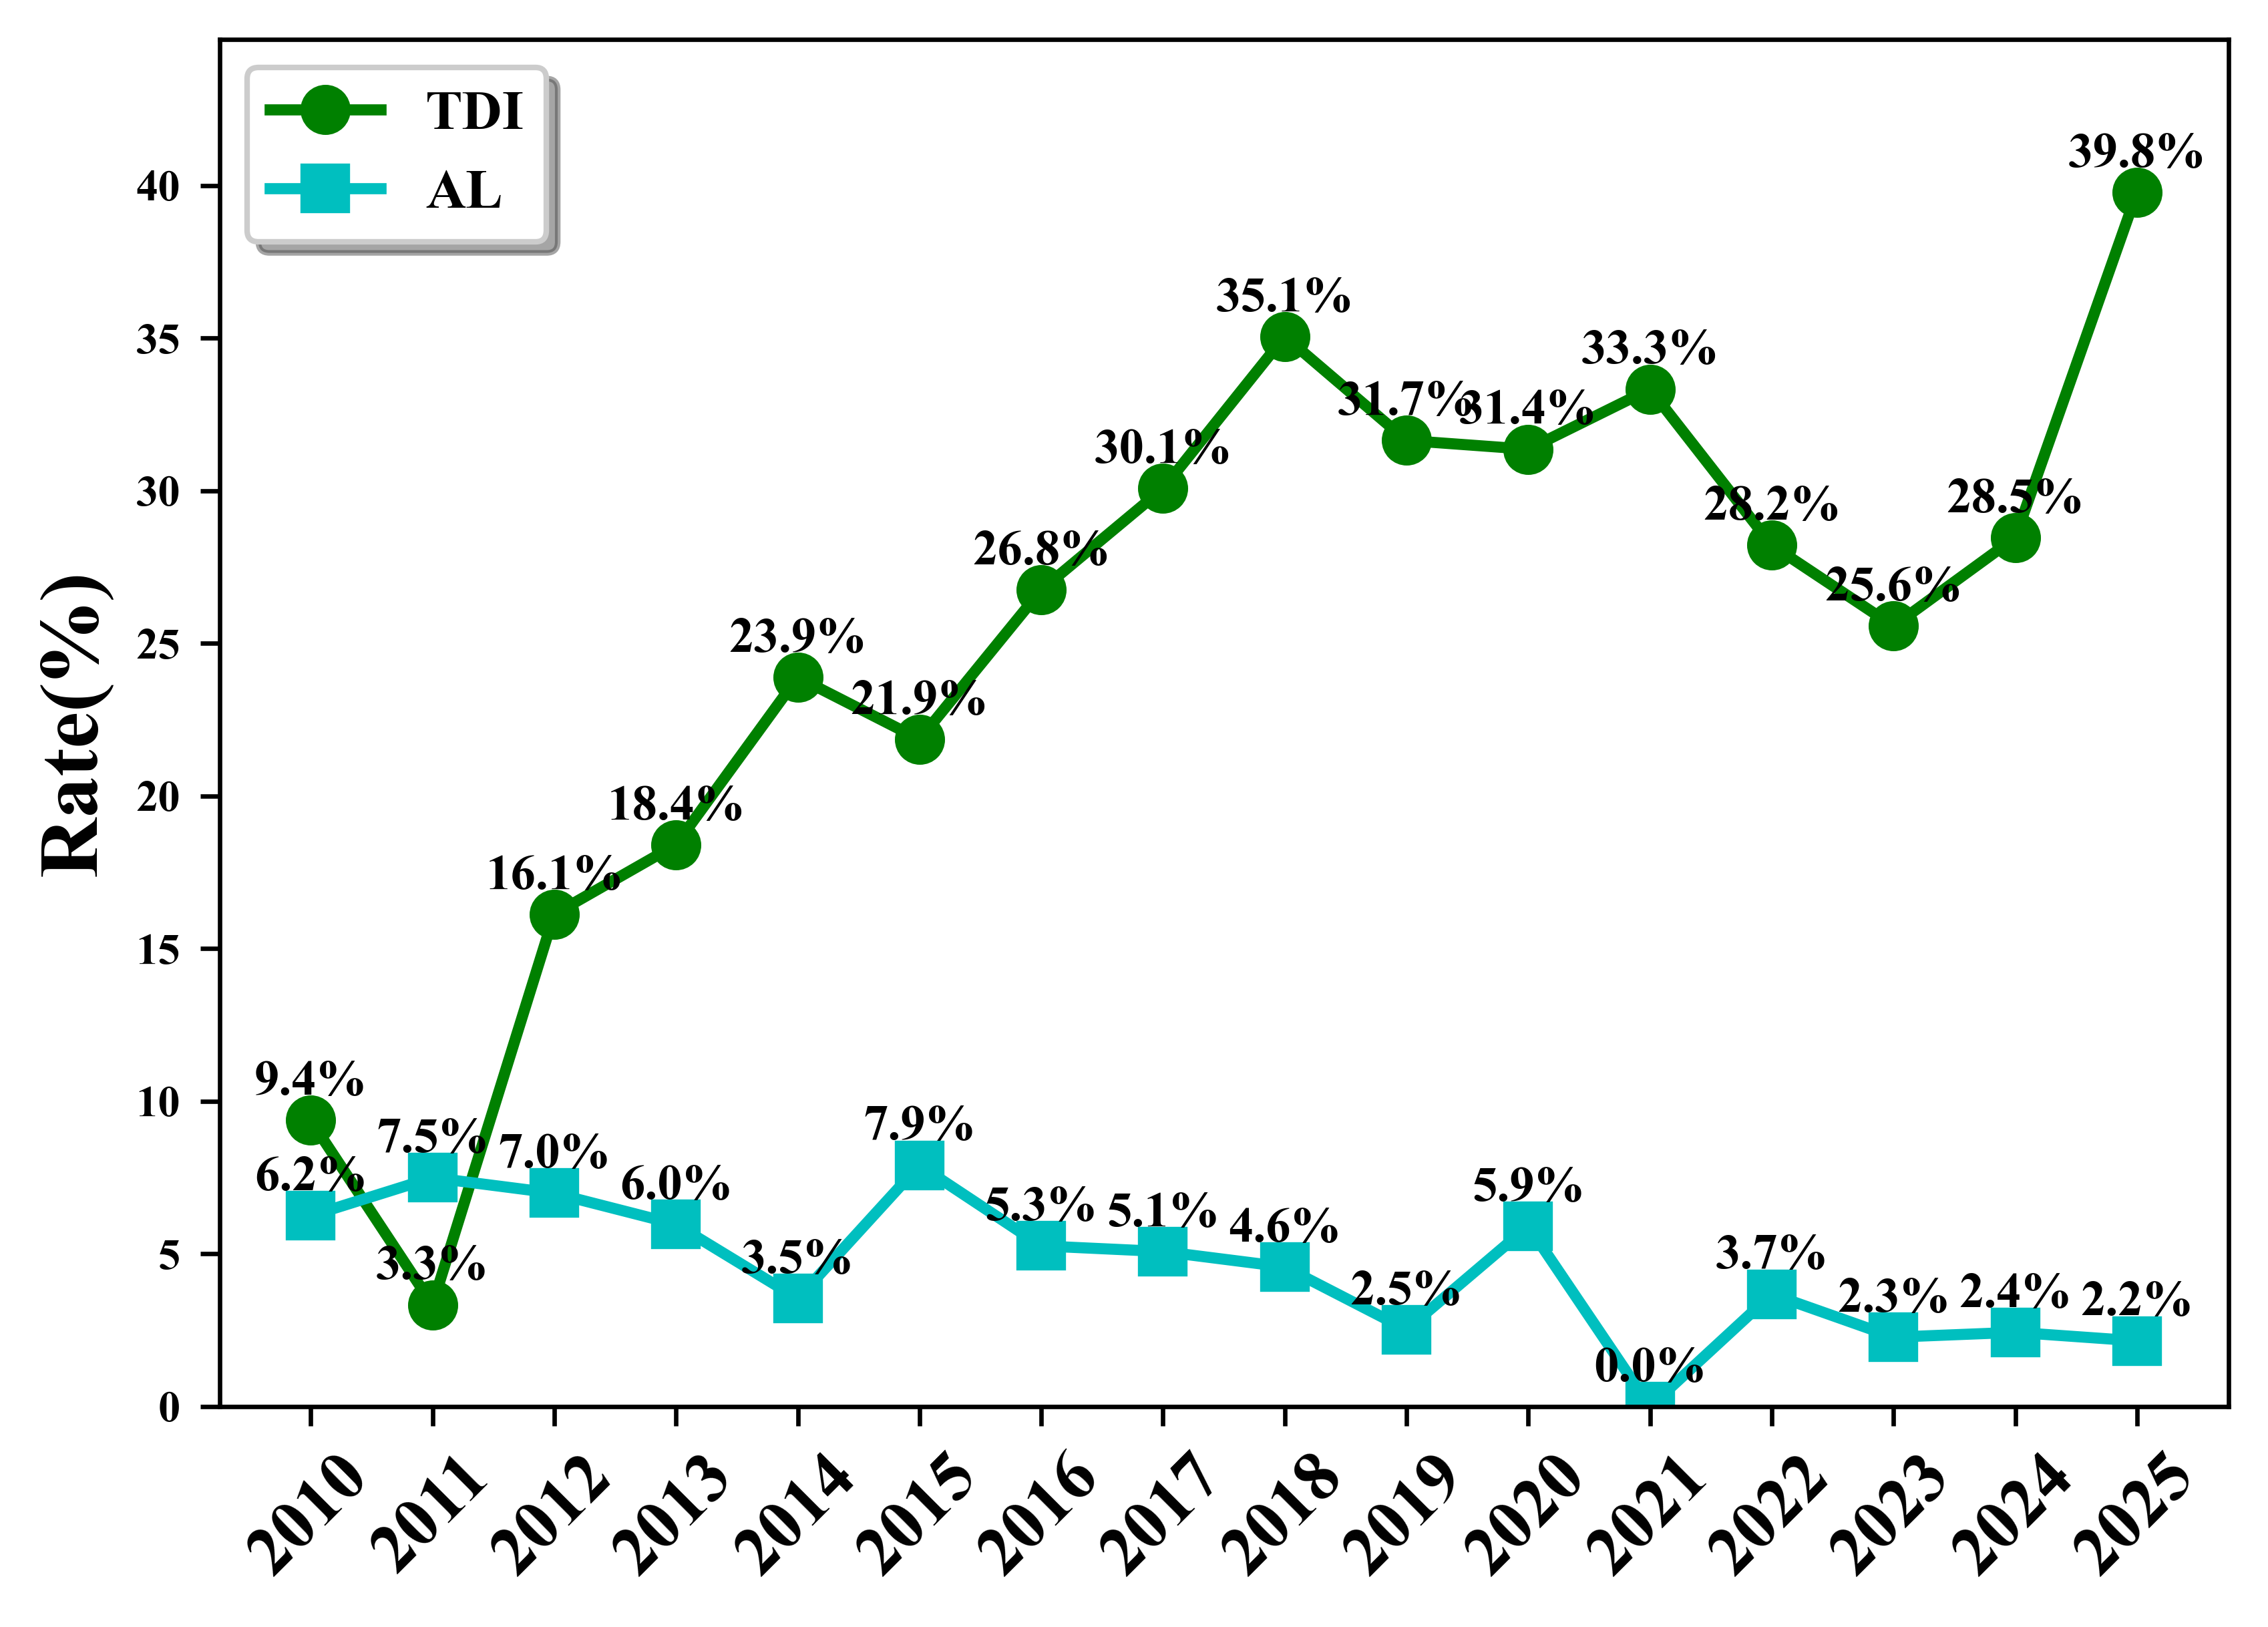

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read Excel
df = pd.read_excel(r'stomarate.xlsx',sheet_name='Sheet1')

plt.figure(figsize=(5.6, 4),dpi=600)

plt.plot(df['year'], df['stoma rate'], marker='o', color='g', linewidth=2, markersize=8, label='TDI')

plt.plot(df['year'], df['AL rate'], marker='s', color='c', linewidth=2, markersize=8, label='AL')

plt.ylabel('Rate(%)', fontproperties='Times New Roman', fontsize=15, weight='bold')

fontdict_prop = {'family': 'Times New Roman',
                 'weight': 'bold',
                 'size': 10,
                 }
plt.legend(fontsize=12, prop=fontdict_prop,frameon=True, shadow=True)

plt.xticks(df['year'], rotation=45,ha='center',fontproperties='Times New Roman', fontsize=12.5, weight='bold')
plt.yticks(fontproperties='Times New Roman', fontsize=8, weight='bold')

plt.ylim(0, max(max(df['stoma rate']), max(df['AL rate'])) + 5)

for x, y1, y2 in zip(df['year'], df['stoma rate'], df['AL rate']):
    plt.text(x, y1 + 0.5, f'{y1:.1f}%', ha='center', va='bottom', fontproperties='Times New Roman', fontsize=9, weight='bold')
    plt.text(x, y2 + 0.5, f'{y2:.1f}%', ha='center', va='bottom', fontproperties='Times New Roman', fontsize=9, weight='bold')

plt.tight_layout(pad=0.5)
#plt.savefig(r"alstoma.jpg",dpi=600)
plt.show()

Figure 2e

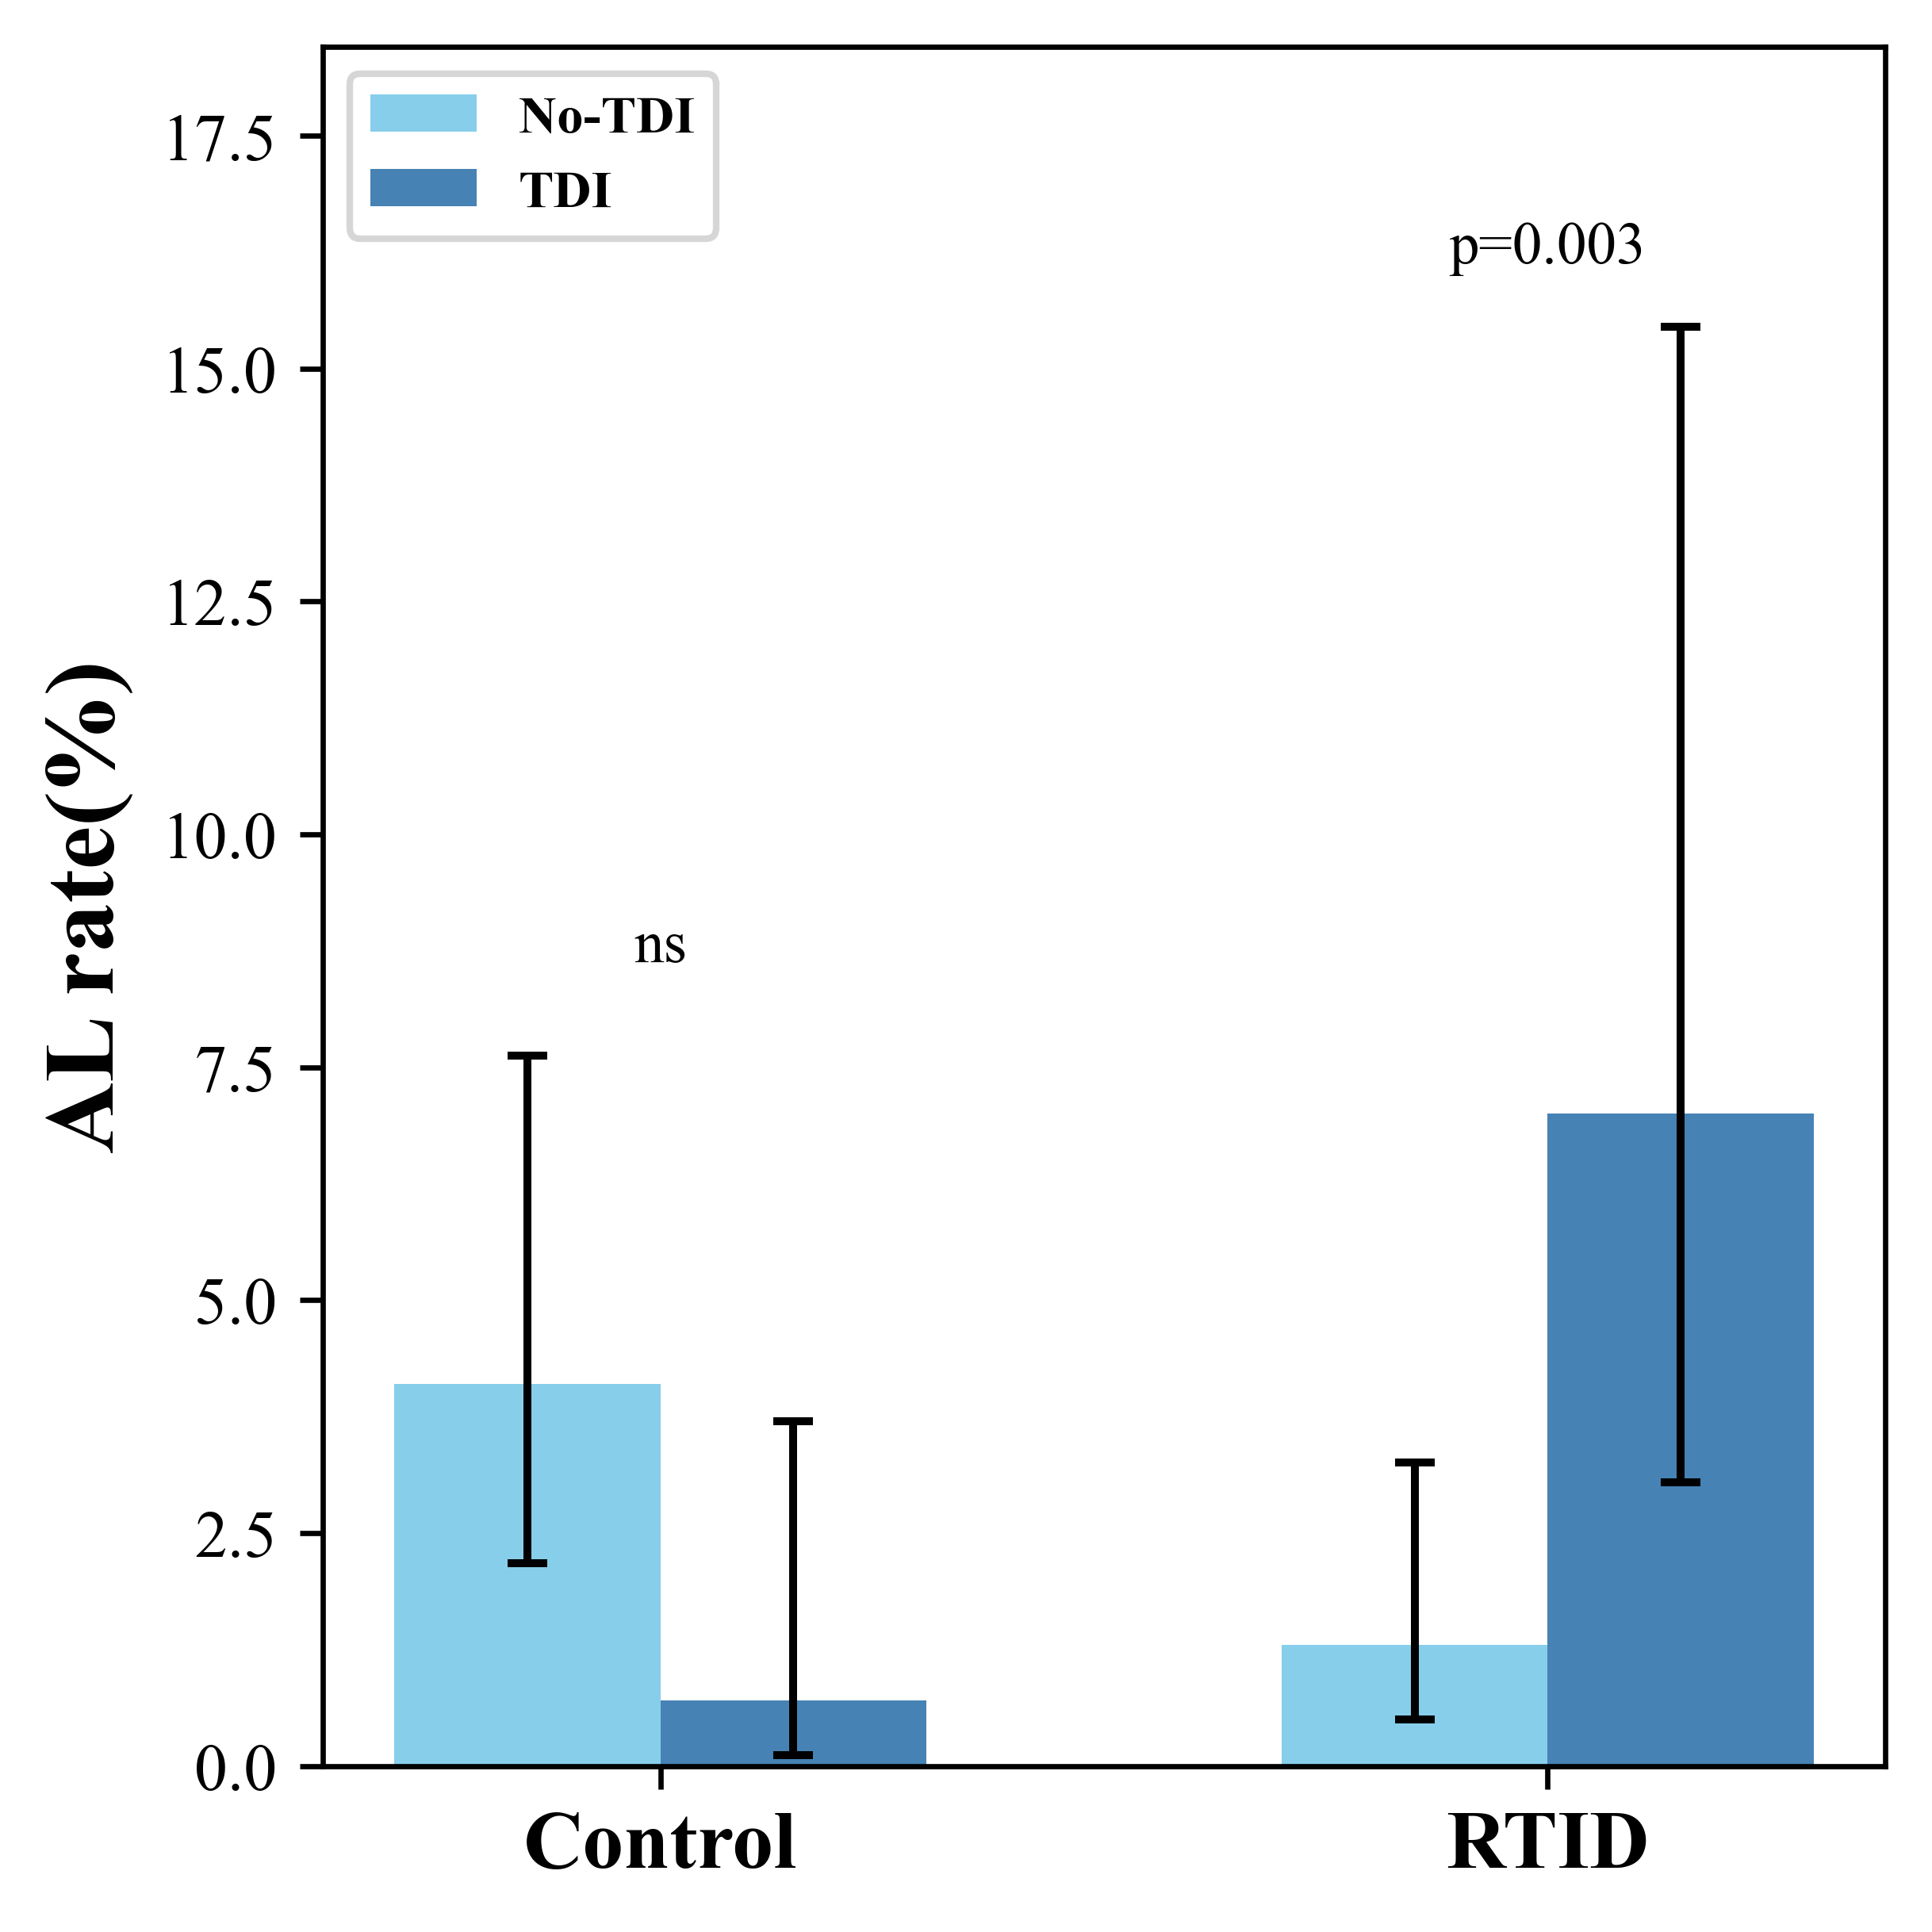

95%CI：

Control:
  No-TDI：4.1% (95%CI: 2.2%-7.6%)
  TDI：0.7% (95%CI: 0.1%-3.7%)

RTID:
  No-TDI：1.3% (95%CI: 0.5%-3.3%)
  TDI：7.0% (95%CI: 3.0%-15.4%)


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# read Excel 
excel_file = pd.ExcelFile(r'table 4.xlsx')
df = excel_file.parse('Sheet2')  

df_filtered = df[df['Unnamed: 0'].isin(['Control', 'RTID'])].reset_index(drop=True)
plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(4, 4), dpi=600)

categories = df_filtered['Unnamed: 0'].tolist()  
control_target = [4.1, 1.3]  
raiti_target = [0.7, 7.0]   

# data：4.1=9/219、0.7=1/149、1.3=4/311、7.0=5/71
sample_data = {
    'Control': {'ctrl_n':9, 'ctrl_total':219, 'raiti_n':1, 'raiti_total':149},  
    'RTID': {'ctrl_n':4, 'ctrl_total':311, 'raiti_n':5, 'raiti_total':71}     
}

# 95%CI
def calculate_exact_95ci(success, total):
    p = success / total 
    z = 1.96
    denominator = 1 + z**2 / total
    center = (p + z**2 / (2 * total)) / denominator
    margin = z * np.sqrt((p * (1 - p) + z**2 / (4 * total)) / total) / denominator
    ci_lower = (center - margin) * 100
    ci_upper = (center + margin) * 100
    return ci_lower, ci_upper

control_ci_lower = []
control_ci_upper = []
raiti_ci_lower = []
raiti_ci_upper = []

for cat in categories:  
    # No-stoma
    ctrl_lower, ctrl_upper = calculate_exact_95ci(
        sample_data[cat]['ctrl_n'], sample_data[cat]['ctrl_total']
    )
    control_ci_lower.append(ctrl_lower)
    control_ci_upper.append(ctrl_upper)
    
    # Stoma
    raiti_lower, raiti_upper = calculate_exact_95ci(
        sample_data[cat]['raiti_n'], sample_data[cat]['raiti_total']
    )
    raiti_ci_lower.append(raiti_lower)
    raiti_ci_upper.append(raiti_upper)

bar_width = 0.3
index = range(len(categories)) 

color_control = 'skyblue'  # No-stoma
color_raiti = 'steelblue'  # Stoma

control_bars = plt.bar(index, control_target, bar_width, label='No-TDI', color=color_control)
raiti_bars = plt.bar([i + bar_width for i in index], raiti_target, bar_width, label='TDI', color=color_raiti)

control_target_np = np.array(control_target)
control_ci_lower_np = np.array(control_ci_lower)
control_ci_upper_np = np.array(control_ci_upper)
raiti_target_np = np.array(raiti_target)
raiti_ci_lower_np = np.array(raiti_ci_lower)
raiti_ci_upper_np = np.array(raiti_ci_upper)

# No-stoma
plt.errorbar(
    x=index,
    y=control_target_np,
    yerr=[control_target_np - control_ci_lower_np, control_ci_upper_np - control_target_np],
    fmt='none',
    ecolor='black',
    capsize=3,
    capthick=1.2,
    elinewidth=1.2
)

# Stoma
plt.errorbar(
    x=[i + bar_width for i in index],
    y=raiti_target_np,
    yerr=[raiti_target_np - raiti_ci_lower_np, raiti_ci_upper_np - raiti_target_np],
    fmt='none',
    ecolor='black',
    capsize=3,
    capthick=1.2,
    elinewidth=1.2
)

plt.xticks([i + bar_width / 2 for i in index], categories, fontsize=12.5, weight='bold')
plt.ylabel('AL rate(%)', fontsize=15, fontproperties='Times New Roman', weight='bold')
plt.legend(labels=['No-TDI','TDI'],prop={'family': 'Times New Roman', 'weight': 'bold','size': 8}, loc='upper left')

max_ci = max(max(control_ci_upper), max(raiti_ci_upper))
plt.ylim(0, max_ci + 3) 

plt.text(0.15, 8.5, 'ns', ha='center', va='bottom', fontproperties='Times New Roman', fontsize=9) 
plt.text(1.15, 16, 'p=0.003', ha='center', va='bottom', fontproperties='Times New Roman', fontsize=9)  

plt.tight_layout(pad=0.5)
plt.savefig(r"stomayual.jpg",dpi=600)
plt.show()

print("95%CI：")
for i, cat in enumerate(categories):
    print(f"\n{cat}:")
    print(f"  No-TDI：{control_target[i]}% (95%CI: {control_ci_lower[i]:.1f}%-{control_ci_upper[i]:.1f}%)")
    print(f"  TDI：{raiti_target[i]}% (95%CI: {raiti_ci_lower[i]:.1f}%-{raiti_ci_upper[i]:.1f}%)")